In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Ajuste de curva

## Parâmetros e funções

In [44]:
WIDTH = 1200
HEIGHT = 1400
BINS = 2048
CONTRAST_RESOLUTION = 14

In [45]:
#Função Gaussiana
def _gaussian(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

#Função que calcula os parâmetros de ajuste
def fitToGaussian(xdata, ydata, paramIni):
    paramVal, paramCov = curve_fit(_gaussian, xdata, ydata, p0=paramIni)

    return paramVal

## Carregar os dados

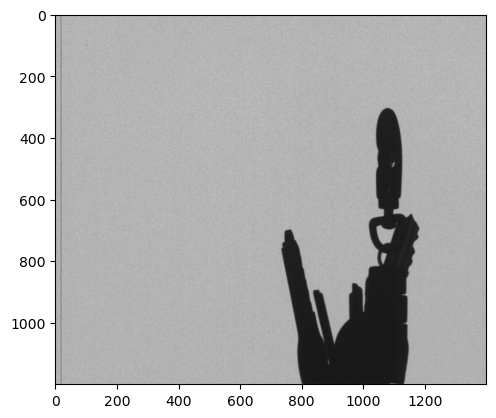

In [37]:
with open('../images/12092024/key_low1.dat', 'rb') as f:
    raw_data = f.read()

image_array = np.frombuffer(raw_data, dtype=np.uint16)
image_array = image_array.reshape(WIDTH, HEIGHT)

plt.imshow(image_array, cmap='gray')
plt.show()

## Plotar o histograma inicial

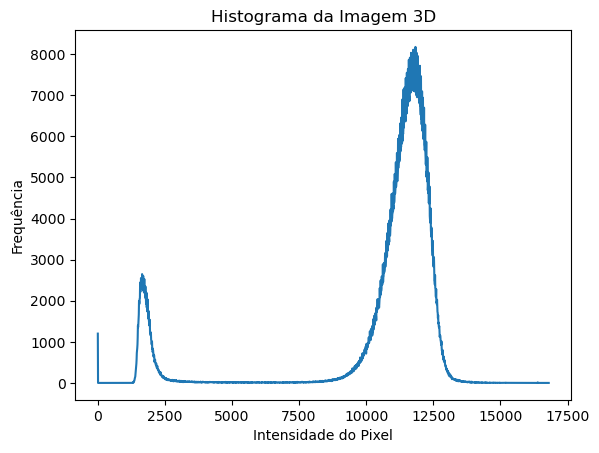

In [38]:
histogram, bin_edges = np.histogram(image_array, bins=BINS, range=(0, 2^CONTRAST_RESOLUTION))

plt.figure()
plt.plot(bin_edges[1:], histogram[:])  # bin_edges tem um elemento a mais que histogram
plt.title('Histograma da Imagem 3D')
plt.xlabel('Intensidade do Pixel')
plt.ylabel('Frequência')
plt.show()

## Calcular o centro e limitar o histograma

In [ ]:
bin_centers = np.zeros(len(histogram))
for i in range(len(bin_edges)-1):
    bin_centers[i] = (bin_edges[i]+bin_edges[i+1])/2

ini = np.argmax(bin_centers > 7500, 0) - np.argmax(bin_centers <= 7500, 0)
fim = np.argmax(bin_centers > 14000, 0) - np.argmax(bin_centers <= 14000, 0)

print(ini, fim)

xdata = bin_centers[ini:fim]
ydata = histogram[ini:fim]

## Ajustar curva e plotar o histograma

[ 7331.51792145 11641.59958394   661.78735464]


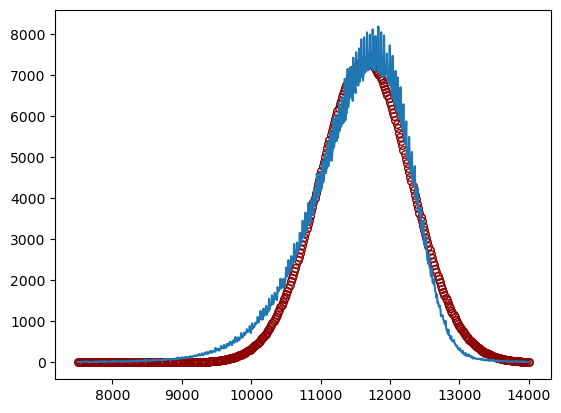

In [43]:
paramFit = fitToGaussian(xdata, ydata, [5000, 12500, 3000])
print(paramFit)

plt.plot(xdata[::2], _gaussian(xdata[::2], paramFit[0], paramFit[1], paramFit[2]),
         linestyle='none', color='darkred', label='Values', linewidth=1.1, marker='.',
         markerfacecolor='None', markeredgecolor='darkred', markersize=11)
plt.plot(xdata[::], ydata[::])
plt.show()